In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import random
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [30]:
# Load the training dataset
train_data = pd.read_excel("Title_Simulation.xlsx", index_col=[0])
train_data

,MID,title,label
0,M3062,Internet-based early intervention to prevent p...,1
1,M7694,Postdeployment suicidal ideations and trajecto...,1
2,M902,Maternal posttraumatic stress disorder symptom...,1
3,M6722,Trajectories of PTSD risk and resilience in Wo...,1
4,M11183,Latent trajectories of trauma symptoms and res...,1
...,...,...,...
293,M10369,Time-course analysis of frontal gene expressio...,0
294,M6107,Treatment outcomes of Veteran men in a compreh...,1
295,M10364,Altered Resting-State functional connectivity ...,0
296,M10348,Psychosocial and Physical Rehabilitation of Bu...,1


In [31]:
# Load the test/validation set
test_data = pd.read_excel("Title_Validation.xlsx", index_col=[0])
test_data

,MID,title,label
0,M10516,"Pre-, peri-, and post-deployment trajectories ...",1
1,M7694,Postdeployment suicidal ideations and trajecto...,1
2,M11183,Latent trajectories of trauma symptoms and res...,1
3,M6722,Trajectories of PTSD risk and resilience in Wo...,1
4,M6707,Factor predicting maternal posttraumatic stres...,1
...,...,...,...
293,M9302,Habituation or sensitization of brain response...,0
294,M11639,Actigraphic evidence of persistent sleep disru...,0
295,M11638,Variation in sleep profiles in children with A...,0
296,M11666,Overlap between birth trauma and mistreatment:...,0


In [32]:
# Train-test split
X_train_str = list(train_data.title.values)
y_train = list(train_data.label.values)
X_test_str = list(test_data.title.values)
y_test = list(test_data.label.values)

# Vectorization

In [33]:
tfidf = TfidfVectorizer()

tfidf.fit(X_train_str) # create the vocabulary

# Vectorize the train text
X_train = tfidf.transform(X_train_str)
# Vectorize the test text
X_test = tfidf.transform(X_test_str)

# Random Classifier

In [34]:
random_preds = [random.randint(0,1) for i in range(len(y_test))]

# Evaluate performance
print(classification_report(y_test, random_preds, digits=4))

              precision    recall  f1-score   support

           0     0.5621    0.5513    0.5566       156
           1     0.5070    0.5180    0.5125       139

    accuracy                         0.5356       295
   macro avg     0.5346    0.5346    0.5345       295
weighted avg     0.5362    0.5356    0.5358       295



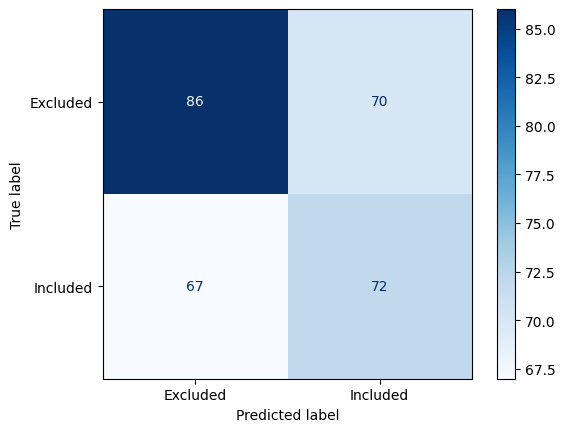

In [35]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, random_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Excluded', 'Included'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

All the models below score higher than a random classifier, so we can use them for comparison with the LLM model

# Logistic Regression

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Evaluate performance
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9836    0.3846    0.5530       156
           1     0.5897    0.9928    0.7399       139

    accuracy                         0.6712       295
   macro avg     0.7867    0.6887    0.6465       295
weighted avg     0.7980    0.6712    0.6411       295



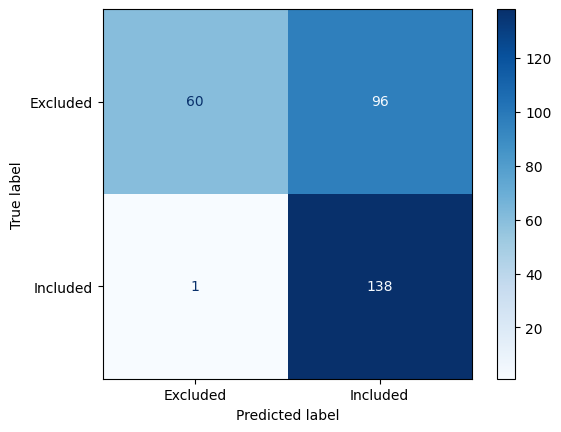

In [38]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Excluded', 'Included'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Random Forest

In [39]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate performance
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9029    0.5962    0.7181       156
           1     0.6719    0.9281    0.7795       139

    accuracy                         0.7525       295
   macro avg     0.7874    0.7621    0.7488       295
weighted avg     0.7941    0.7525    0.7470       295



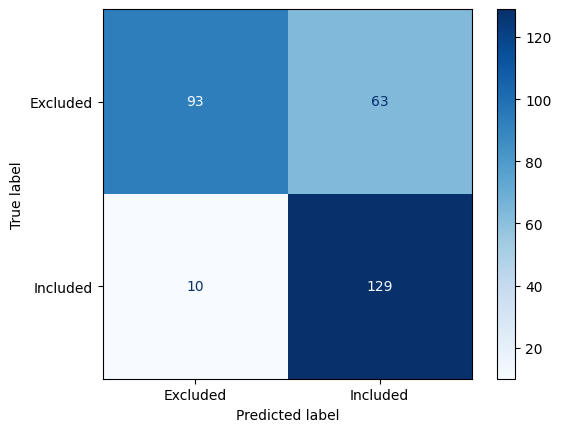

In [40]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Excluded', 'Included'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Naive Bayes

In [41]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate performance
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.2372    0.3834       156
           1     0.5388    1.0000    0.7003       139

    accuracy                         0.5966       295
   macro avg     0.7694    0.6186    0.5418       295
weighted avg     0.7827    0.5966    0.5327       295



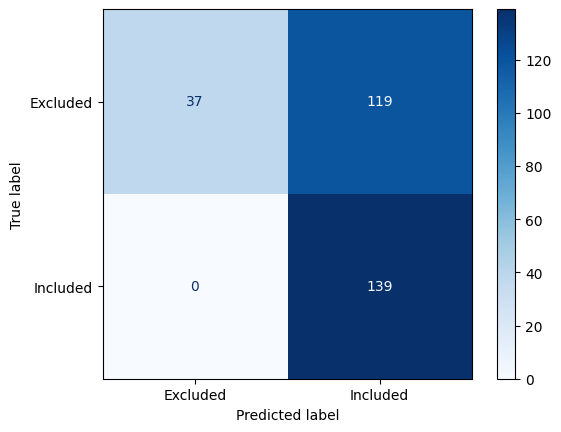

In [42]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Excluded', 'Included'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Support Vector Machine

In [43]:
sv = SVC()
sv.fit(X_train, y_train)

# Evaluate performance
y_pred = sv.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.3654    0.5352       156
           1     0.5840    1.0000    0.7374       139

    accuracy                         0.6644       295
   macro avg     0.7920    0.6827    0.6363       295
weighted avg     0.8040    0.6644    0.6305       295



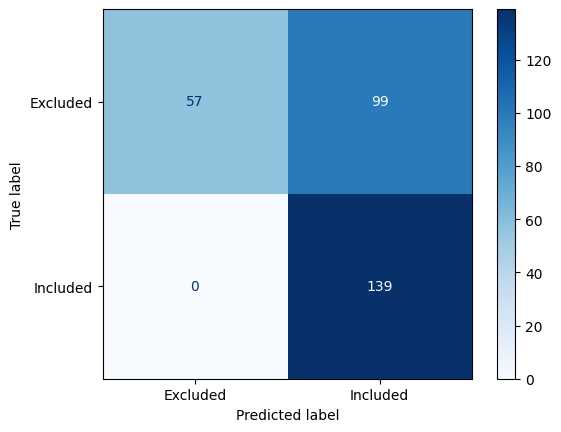

In [44]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Excluded', 'Included'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Llama3:8b

In [57]:
import requests
import re

In [45]:
# Load the test dataset
val_df = pd.read_excel("Validation_LLM.xlsx", index_col=[0])
val_df

,MID,title
0,M10516,"Pre-, peri-, and post-deployment trajectories ..."
1,M7694,Postdeployment suicidal ideations and trajecto...
2,M11183,Latent trajectories of trauma symptoms and res...
3,M6722,Trajectories of PTSD risk and resilience in Wo...
4,M6707,Factor predicting maternal posttraumatic stres...
...,...,...
293,M9302,Habituation or sensitization of brain response...
294,M11639,Actigraphic evidence of persistent sleep disru...
295,M11638,Variation in sleep profiles in children with A...
296,M11666,Overlap between birth trauma and mistreatment:...


In [ ]:
abs_val = pd.read_excel('Abstract_Validation.xlsx')

# Prompt 3.1
Give emphasis on being lenient inside the prompt

In [46]:
# This function runs prompts that ask to label a test dataset and outputs the final labelled dataset
# https://github.com/ollama/ollama/blob/main/docs/api.md#generate-a-completion

url = "http://145.38.195.8:11434/api/generate"

def run_prompt(model, prompt_file, df_in, df_out, options=None, system=None, context=None, raw=False, keep_alive='5m'):

    # Empty list to store the response for each title
    responses = []

    # Load the prompt
    try:
        with open(prompt_file, 'r') as file:
            prompt = file.read()
    
    except FileNotFoundError:
        print(f"File '{prompt_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    file.close()

    # Copy the test dataset
    output_df = df_in

    # Run the prompt once for each title of the test dataset
    for title in df_in['title']:
        payload = {
            "model": model,
            "prompt": prompt + '"' + title + '"',
            "stream": False}

        # Include optional parameters if they are provided
        if options is not None:
            payload["options"] = options
        if system is not None:
            payload["system"] = system
        if context is not None:
            payload["context"] = context
        if raw is not False:
            payload["raw"] = True
        if keep_alive != '5m':
            payload["keep_alive"] = keep_alive

        # Sending the POST request
        response = requests.post(url, json=payload)

        # Append the response in the responses list
        responses.append(response.json()['response'])

    # Add the responses in the list in a new empty column for the labels in the output dataset
    output_df.loc[:,'label'] = responses

    # Save the labeled dataset 
    output_df.to_excel(df_out)

    # Calculate how fast the response is generated in tokens per second (token/s)
    time_to_respond = response.json()['eval_count'] / response.json()['eval_duration'] * 10**9

    print(time_to_respond, "tokens per second")

In [47]:
# Create a function to automate the prompt evaluation by comparing it to the humanly labelled dataset as a benchmark
def evaluate_prompt(dataset, benchmark):
    
    # Load the dataset
    df = pd.read_excel(dataset)
    
    # Plot the confusion matrix
    confusion_matrix = metrics.confusion_matrix(benchmark['label'], df['label'])
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Excluded', 'Included'])
    cm_display.plot(cmap=plt.cm.Blues)
    
    return plt.show()

141.86409419775856 tokens per second


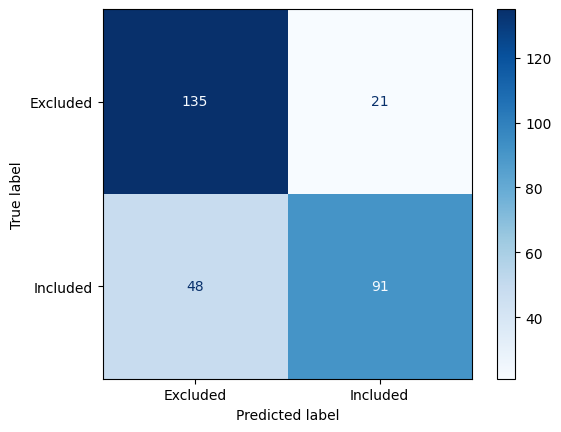

In [53]:
run_prompt(
    model = "llama3:8b", 
    prompt_file = "prompt3.txt", 
    df_in = val_df, 
    df_out = "Val_Llama3_8b_3.1.xlsx", 
    options = {"seed": 42, "temperature": 0}  # for reproducible outputs, set temperature to 0 and seed to a number
    )

# Compare the model's labels with the human title labels
evaluate_prompt("Val_Llama3_8b_3.1.xlsx", test_data)

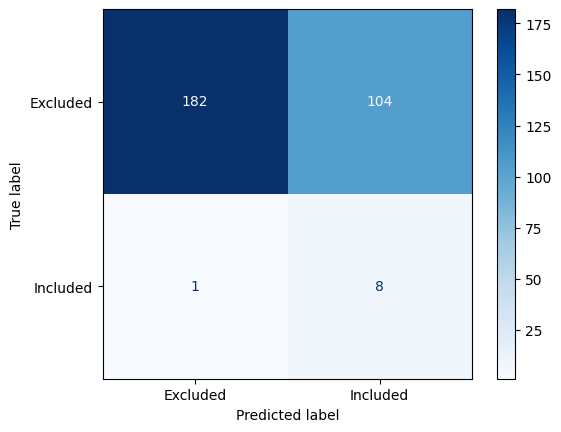

In [54]:
# Compare the model's labels with the human abstract labels
evaluate_prompt("Val_Llama3_8b_3.1.xlsx", abs_val)

In [81]:
# Classification report on the title labels
pred = pd.read_excel("Val_Llama3_8b_3.1.xlsx")
print(classification_report(test_data['label'], pred['label'], digits=4))

              precision    recall  f1-score   support

           0     0.7377    0.8654    0.7965       156
           1     0.8125    0.6547    0.7251       139

    accuracy                         0.7661       295
   macro avg     0.7751    0.7600    0.7608       295
weighted avg     0.7729    0.7661    0.7628       295



In [82]:
# Classification report on the abstract labels
print(classification_report(abs_val['label'], pred['label'], digits=4))

              precision    recall  f1-score   support

           0     0.9945    0.6364    0.7761       286
           1     0.0714    0.8889    0.1322         9

    accuracy                         0.6441       295
   macro avg     0.5330    0.7626    0.4542       295
weighted avg     0.9664    0.6441    0.7565       295



# Prompt 17
Two-shot prompting + providing step by step reasoning in the two examples.

For this task the "run_prompt" function needs to be slightly changed.

In [73]:
# This function runs prompts that ask to label a test dataset and outputs the final labelled dataset
# https://github.com/ollama/ollama/blob/main/docs/api.md#generate-a-completion

def run_prompt(model, prompt_file, df_in, df_out, options=None, system=None, context=None, raw=False, keep_alive='5m'):

    # Empty list to store the response for each title
    responses = []

    # Load the prompt
    try:
        with open(prompt_file, 'r') as file:
            prompt = file.read()
    
    except FileNotFoundError:
        print(f"File '{prompt_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    file.close()

    # Copy the test dataset
    output_df = df_in

    # Run the prompt once for each title of the test dataset
    for title in df_in['title']:
        payload = {
            "model": model,
            "prompt": prompt + '"' + title + '"',
            "stream": False}

        # Include optional parameters if they are provided
        if options is not None:
            payload["options"] = options
        if system is not None:
            payload["system"] = system
        if context is not None:
            payload["context"] = context
        if raw is not False:
            payload["raw"] = True
        if keep_alive != '5m':
            payload["keep_alive"] = keep_alive

        # Sending the POST request
        response = requests.post(url, json=payload)

        # Append the response in the responses list
        responses.append(response.json()['response'])

    # Split the label part from the reasoning provided in the model response
    label = []
    for s in responses:
        if '#' in s:
            lbl = re.search('#(.*)#', s)
            label.append(lbl.group(1))
        else:
            label.append("Invalid format")
            
    # Add the reasonings and labels in the list in a new empty column of the output dataset
    output_df.loc[:,'reasoning'] = responses
    output_df.loc[:,'label'] = label

    # Save the labeled dataset 
    output_df.to_excel(df_out)

    # Calculate how fast the response is generated in tokens per second (token/s)
    time_to_respond = response.json()['eval_count'] / response.json()['eval_duration'] * 10**9

    print(time_to_respond, "tokens per second")

In [78]:
run_prompt(
    model = "llama3:8b", 
    prompt_file = "prompt17.txt", 
    df_in = val_df, 
    df_out = "Val_Llama3_8b_17.xlsx", 
    options = {"seed": 42, "temperature": 0,  # for reproducible outputs, set temperature to 0 and seed to a number
               "num_predict": -1},  # for infinte text generation
    system = "Be conservative. If you find an ambiguous title, it is better to include it: I prefer including papers by mistake rather than excluding them by mistake. You want to have as little false negatives as possible. Step 1 has the priority over step 2."
    )

67.9112417483488 tokens per second


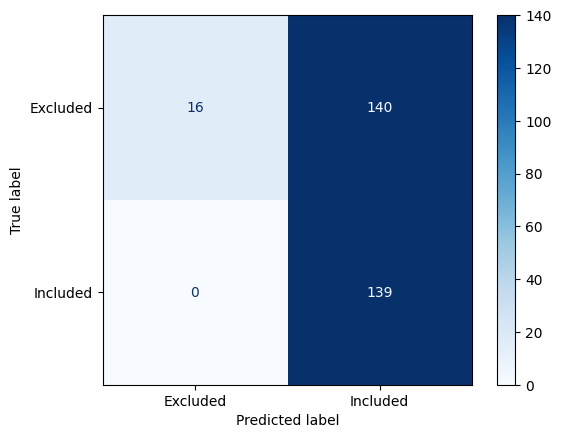

In [79]:
# Compare the model's labels with the human title labels
evaluate_prompt("Val_Llama3_8b_17.xlsx", test_data)

In [80]:
# Classification report on the title labels
pred = pd.read_excel("Val_Llama3_8b_17.xlsx")
print(classification_report(test_data['label'], pred['label'], digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.1026    0.1860       156
           1     0.4982    1.0000    0.6651       139

    accuracy                         0.5254       295
   macro avg     0.7491    0.5513    0.4256       295
weighted avg     0.7636    0.5254    0.4118       295



# Result analysis

In [89]:
# Create a list of all the models' outputs
outputs = [
    {"Recall":  0.5180, "FN": 67, "TN": 86, "Compared with": "human titles labels"},
    {"Recall":  0.9928, "FN": 1, "TN": 60, "Compared with": "human titles labels"},
    {"Recall":  0.9281, "FN": 10, "TN": 93, "Compared with": "human titles labels"},
    {"Recall":  1.0000, "FN": 0, "TN": 37, "Compared with": "human titles labels"},
    {"Recall":  1.0000, "FN": 0, "TN": 57, "Compared with": "human titles labels"},
    {"Recall":  1.0000, "FN": 0, "TN": 16, "Compared with": "human titles labels"},
    {"Recall":  0.8889, "FN": 1, "TN": 182, "Compared with": "human abstracts labels"}
]

# Create the dataset containing the results
performances = pd.DataFrame(outputs, 
                            index=pd.Index([
                                "Random Classifier", "Logistic Regression", "Random Forest", "Naive Bayes", "Support Vector Machine", "Llama3:8b (prompt 17)", "Llama3:8b (prompt 3.1)"
                                ]))
performances

In [86]:
performances.to_csv("Models_performances.csv")